<a href="https://colab.research.google.com/github/mdsaeed24/mdsaeed24/blob/main/ANALYZING_SOCIAL_MEDIA_DATA_TO_UNDERSTAND_CUSTOMER_PREFERENCES_AND_IMPROVE_SOCIAL_MEDIA_MARKETING_STRATEGIESr_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import re
import os
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Data Loading

In [ ]:
tweet= pd.read_csv("Tweets.csv")
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Data Preprocessing

In [ ]:
print("The dataframe shape is:",tweet.shape)
print("Null values in each column are: \n", tweet.isna().sum())

The dataframe shape is: (14640, 15)
Null values in each column are: 
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [ ]:
print("Percentage null values in the dataframe")
((tweet.isnull() | tweet.isna()).sum() * 100 / tweet.index.size).round(2)

Percentage null values in the dataframe


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [ ]:
del tweet['airline_sentiment_gold']
del tweet['tweet_coord']
del tweet['negativereason_gold']
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
tweet.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'name',
       'retweet_count', 'text', 'tweet_created', 'tweet_location',
       'user_timezone'],
      dtype='object')

Counting the airline sentiment for each airline

Number of tweets per airline is: 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


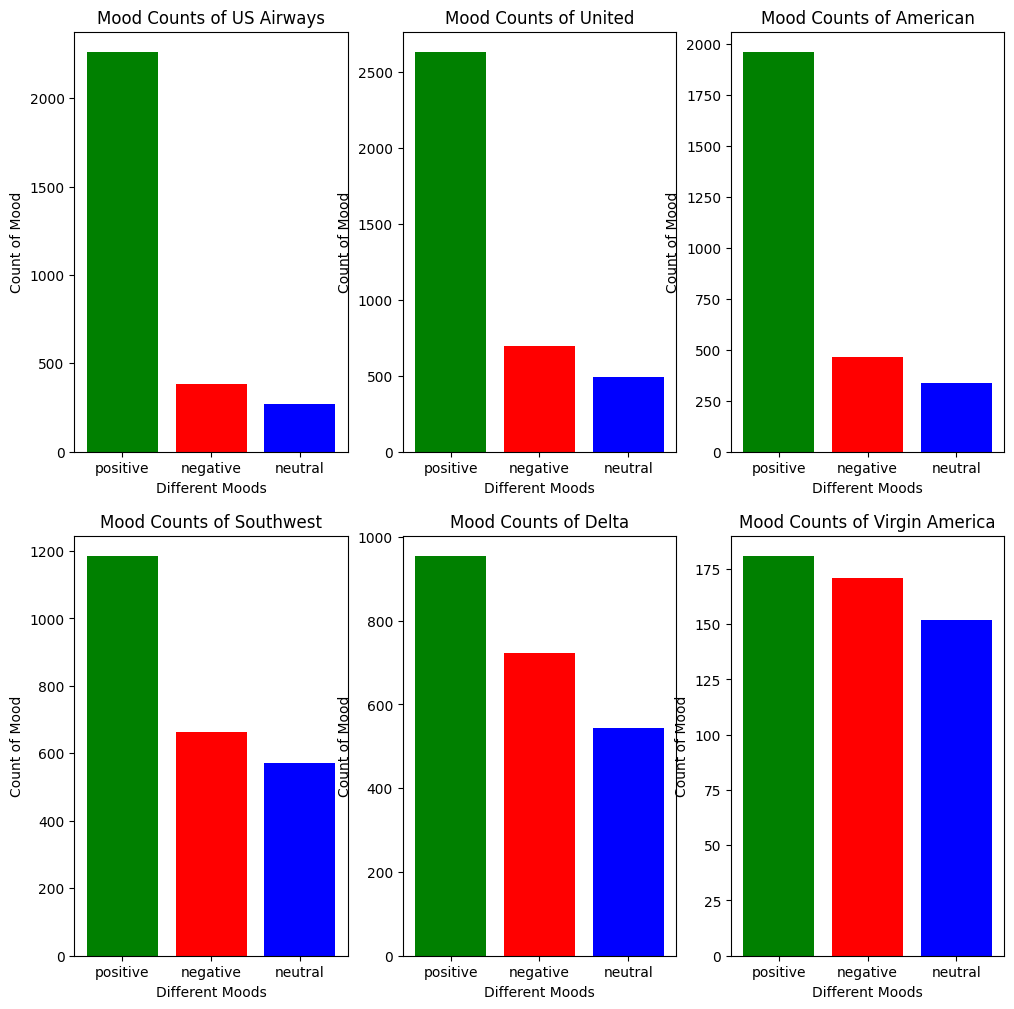

In [ ]:
print("Number of tweets per airline is: \n ",tweet.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
tweet_airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in tweet_airlines:
    indices= tweet_airlines.index(i)
    plt.subplot(2,3,indices+1)
    tweet_new=tweet[tweet['airline']==i]
    count=tweet_new['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['green', 'red', 'blue'])
    plt.xticks(Index,['positive','negative','neutral'])
    plt.ylabel('Count of Mood')
    plt.xlabel('Different Moods')
    plt.title('Mood Counts of '+i)

Word Cloud for negative words

In [ ]:
from wordcloud import WordCloud,STOPWORDS

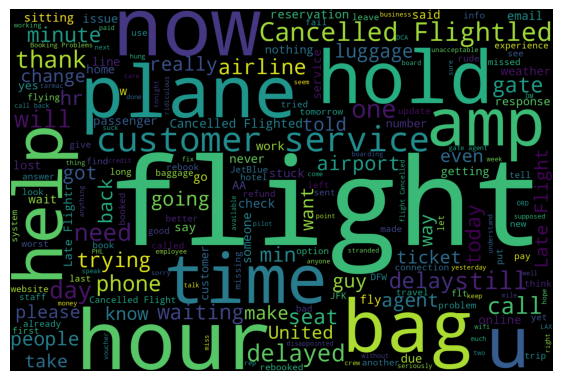

In [ ]:
tweet_new=tweet[tweet['airline_sentiment']=='negative']
word = ' '.join(tweet_new['text'])
word_cleaned = " ".join([word for word in word.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud_negative = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1500,
                      height=1000
                     ).generate(word_cleaned)
plt.figure(1,figsize=(7, 7))
plt.imshow(wordcloud_negative)
plt.axis('off')
plt.show()

Word Cloud for positive words

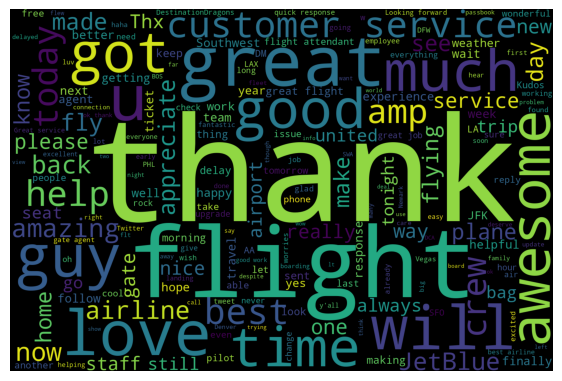

In [ ]:
tweet_new=tweet[tweet['airline_sentiment']=='positive']
word = ' '.join(tweet_new['text'])
word_cleaned = " ".join([word for word in word.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud_positive = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1500,
                      height=1000
                     ).generate(word_cleaned)
plt.figure(1,figsize=(7, 7))
plt.imshow(wordcloud_positive)
plt.axis('off')
plt.show()

Word frequency for negative words

In [ ]:
def frequency(str):

    # breaking the string
    str = str.split()
    str2 = []

    # looping
    for i in str:

        # identification of duplicacy
        if i not in str2:

            # inserting values
            str2.append(i)

    for i in range(0, len(str2)):
        if(str.count(str2[i])>50):
            print('Frequency of', str2[i], 'is :', str.count(str2[i]))

print(frequency(word_cleaned))

Frequency of to is : 923
Frequency of the is : 924
Frequency of time is : 59
Frequency of I is : 574
Frequency of fly is : 54
Frequency of this is : 143
Frequency of :) is : 96
Frequency of it is : 166
Frequency of was is : 226
Frequency of and is : 416
Frequency of an is : 74
Frequency of good is : 75
Frequency of so is : 163
Frequency of much is : 54
Frequency of is is : 219
Frequency of a is : 501
Frequency of great is : 144
Frequency of my is : 320
Frequency of &amp; is : 77
Frequency of on is : 327
Frequency of I'm is : 67
Frequency of flying is : 59
Frequency of your is : 212
Frequency of all is : 92
Frequency of from is : 124
Frequency of Thanks! is : 69
Frequency of for is : 658
Frequency of flight is : 263
Frequency of but is : 91
Frequency of you is : 509
Frequency of would is : 56
Frequency of be is : 135
Frequency of with is : 195
Frequency of you. is : 77
Frequency of love is : 85
Frequency of You is : 62
Frequency of are is : 120
Frequency of of is : 236
Frequency of that

Graphical distribution to show reasons for negative tweets

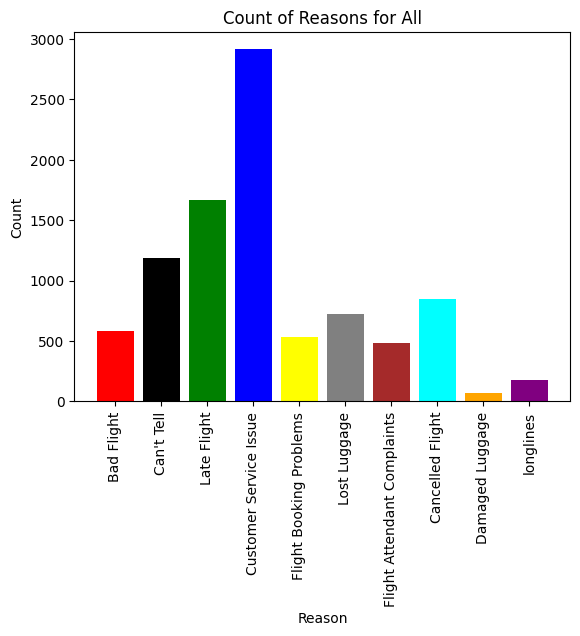

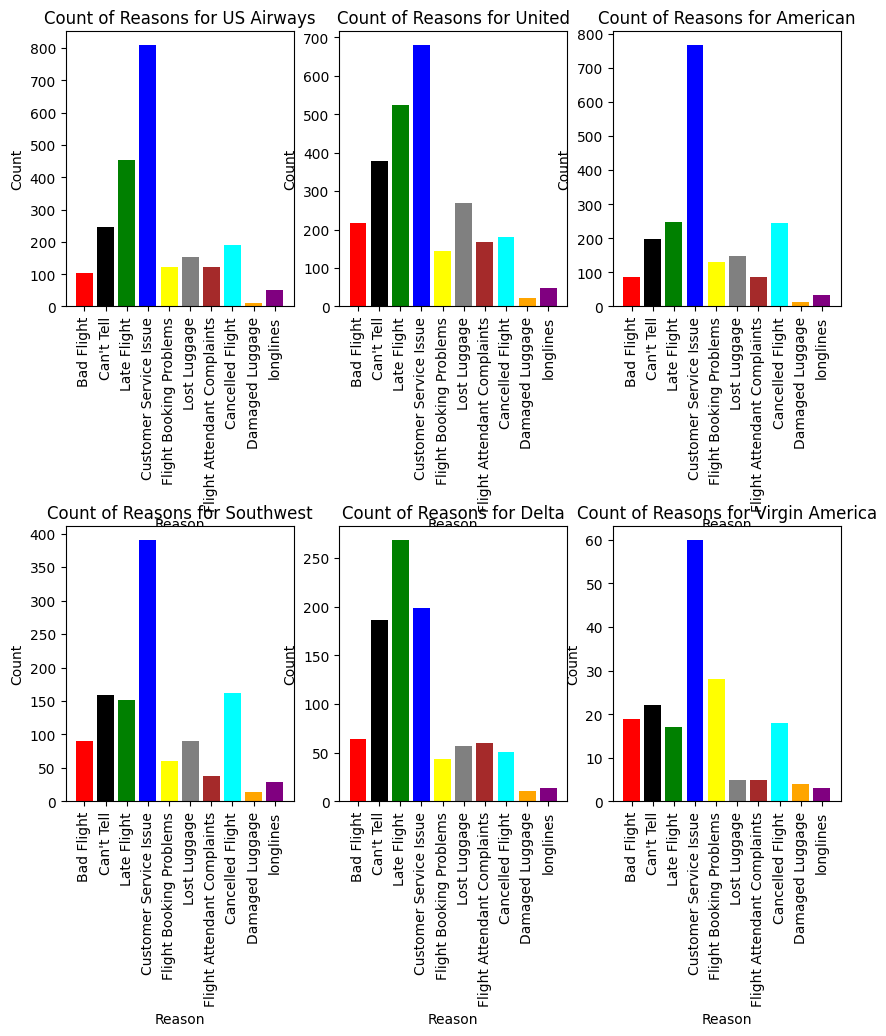

In [ ]:
tweet['negativereason'].nunique()

NR_Count=dict(tweet['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        air=tweet
    else:
        air=tweet[tweet['airline']==Airline]
    count=dict(air['negativereason'].value_counts())
    Unique_reason=list(tweet['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):

    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','black','green','blue','yellow','gray','brown','cyan','orange','purple'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

plot_reason('All')
plt.figure(2,figsize=(10, 10))
for i in tweet_airlines:
    indices= tweet_airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.8)
    plot_reason(i)

In [ ]:
date_tweet = tweet.reset_index()
# Converting date column
date_tweet.tweet_created = pd.to_datetime(date_tweet.tweet_created)
# Reduction of dates in date column
date_tweet.tweet_created = date_tweet.tweet_created.dt.date
date_tweet.tweet_created.head()
dataframe = date_tweet
day_dataframe = dataframe.groupby(['tweet_created','airline','airline_sentiment']).size()

day_dataframe

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  negative              10
                               neutral                6
                               positive              13
Length: 136, dtype: int64

Negative sentiment according to date

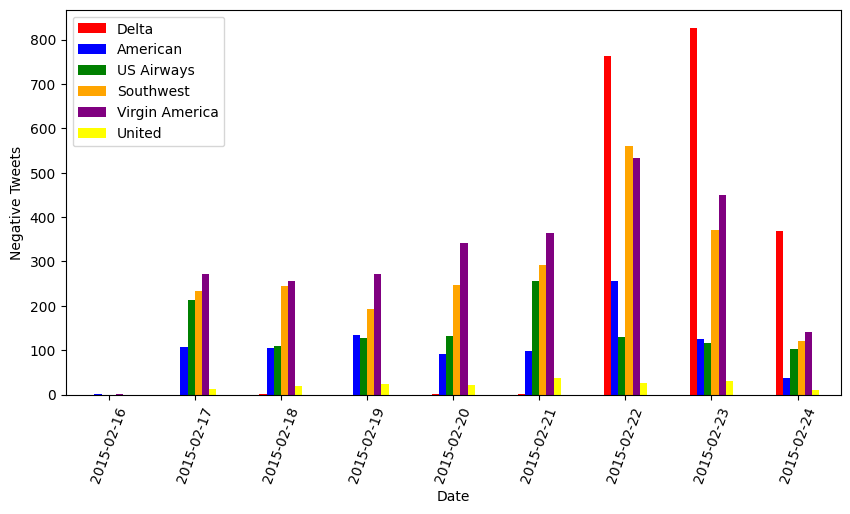

In [ ]:
day_dataframe = day_dataframe.loc(axis=0)[:,:,'negative']

# Grouping and plotting data
ax_2 = day_dataframe.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'blue', 'green','orange','purple','yellow'], figsize = (10,5), rot = 70)
labels = ['Delta','American','US Airways','Southwest','Virgin America','United']
ax_2.legend(labels = labels)
ax_2.set_xlabel('Date')
ax_2.set_ylabel('Negative Tweets')
plt.show()

Preprocessing of tweet text data

In [ ]:
def tweet_to_words(tweet):
    only_letters = re.sub("[^a-zA-Z]", " ",tweet)
    word = only_letters.lower().split()
    stop = set(stopwords.words("english"))
    meaningful_words = [w for w in word if not w in stop]
    return( " ".join( meaningful_words ))

In [ ]:
tweet['tweet_clean']=tweet['text'].apply(lambda x: tweet_to_words(x))

In [ ]:
train_data,test_data = train_test_split(tweet,test_size=0.25,random_state=49)

In [ ]:
train_tweet_clean=[]
for tweet in train_data['tweet_clean']:
    train_tweet_clean.append(tweet)
test_tweet_clean=[]
for tweet in test_data['tweet_clean']:
    test_tweet_clean.append(tweet)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(analyzer = "word")
train_features= vect.fit_transform(train_tweet_clean)
test_features=vect.transform(test_tweet_clean)

In [ ]:
Diff_Classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=250)]

Sentiment prediction for tweet text data

Accuracy of DecisionTreeClassifier is: 0.678415300546448
              precision    recall  f1-score   support

    negative       0.79      0.80      0.79      2312
     neutral       0.43      0.39      0.41       808
    positive       0.55      0.61      0.58       540

    accuracy                           0.68      3660
   macro avg       0.59      0.60      0.59      3660
weighted avg       0.67      0.68      0.68      3660



<Figure size 640x480 with 0 Axes>

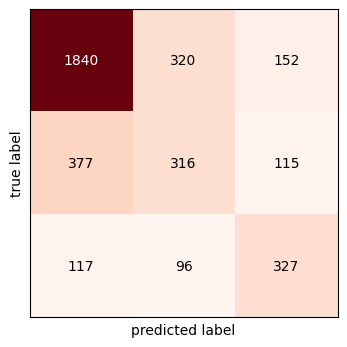

Accuracy of RandomForestClassifier is: 0.7688524590163934
              precision    recall  f1-score   support

    negative       0.91      0.81      0.86      2621
     neutral       0.45      0.59      0.51       556
    positive       0.59      0.72      0.65       483

    accuracy                           0.77      3660
   macro avg       0.65      0.71      0.67      3660
weighted avg       0.80      0.77      0.78      3660



<Figure size 640x480 with 0 Axes>

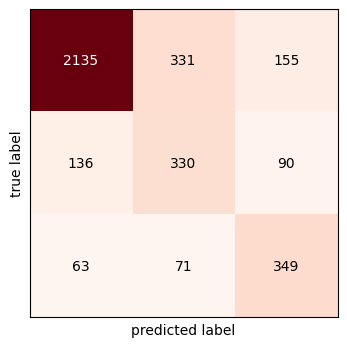

In [ ]:
features_dense=train_features.toarray()
test_dense= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Diff_Classifiers:
    try:
        fit = classifier.fit(train_features,train_data['airline_sentiment'])
        prediction = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(features_dense,train_data['airline_sentiment'])
        prediction = fit.predict(test_dense)
    accuracy = accuracy_score(prediction,test_data['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is: '+str(accuracy))
    print(classification_report(prediction,test_data['airline_sentiment']))
    conf_mat=confusion_matrix(prediction , test_data['airline_sentiment'])
    plt.figure()
    plot_confusion_matrix(conf_mat,figsize=(7,4), hide_ticks=True,cmap=plt.cm.Reds)
    plt.show()